In [1]:
import os

In [2]:
%pwd

'd:\\End-to-End-Machine-Learning-Project-with-MLFlow\\End-to-end-Machine-Learning-Project-with-MLflow\\research'

In [3]:
os.chdir("../")


In [4]:
%pwd

'd:\\End-to-End-Machine-Learning-Project-with-MLFlow\\End-to-end-Machine-Learning-Project-with-MLflow'

In [5]:
import os
from mlProject import logger
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

#Let therebe display from multiple commands

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [6]:
data=pd.read_csv("artifacts\data_ingestion\Train.csv")

In [7]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
data.shape

(8523, 12)

In [10]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [11]:
data.describe() #Statistical view

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [12]:
data.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

# Data Exploration, Preprocessing and Cleaning 

In [13]:
data.isnull().sum()  # Checking null values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace=True)   #Filling missing values with mean for Item weight column for train.csv

In [15]:
data.Outlet_Size.value_counts()  # Balancing categories with less category value by filling missing with "High category"

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [16]:
data['Outlet_Size'].fillna("High", inplace=True)

In [17]:
data.isnull().sum() #No missing value in train file

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [18]:
data["Item_Fat_Content"].value_counts() #Low fat and regular category is duplicated (Lowfat with LF and lowfat /Regular with reg) Changed columns value from project to Project


Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [19]:
data["Item_Fat_Content"] = data["Item_Fat_Content"].replace(['LF'], 'Low Fat')
data["Item_Fat_Content"] = data["Item_Fat_Content"].replace(['low fat'], 'Low Fat')
data["Item_Fat_Content"] = data["Item_Fat_Content"].replace(['reg'], 'Regular')

In [20]:
data["Item_Fat_Content"].value_counts()  #Replacement of column category is done with filling correct category and data correction is complete now

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [21]:
data ["Item_Identifier"].value_counts()

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64

In [22]:
data['Item_Visibility'].value_counts()

Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: count, Length: 7880, dtype: int64

In [23]:
print(data['Item_Visibility'].mean())  # Checking mean value to fill Zeros with mean



0.06613202877895108


In [24]:
data['Item_Visibility'] = data['Item_Visibility'].replace(0, 0.066132)

In [25]:
data[["Item_Visibility"]].value_counts() # Replaced Zeros with mean

Item_Visibility
0.066132           526
0.076975             3
0.112203             2
0.145266             2
0.071958             2
                  ... 
0.038729             1
0.038729             1
0.038725             1
0.038722             1
0.328391             1
Name: count, Length: 7880, dtype: int64

In [26]:
data['Years_Established'] = data['Outlet_Establishment_Year'].apply(lambda x: 2024 - x)
#data.head()

In [27]:
# Log transform a single column
data['NewTargetwithLOG'] = np.log(data['Item_Outlet_Sales'])

<Axes: xlabel='NewTargetwithLOG', ylabel='Count'>

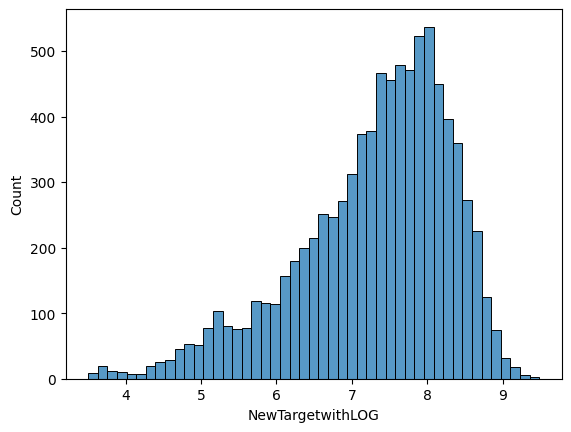

In [28]:
#plt.figure(figsize = (8, 8))
sns.histplot(data["NewTargetwithLOG"])
plt.show()

In [29]:
data.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [30]:
data.columns



Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Years_Established', 'NewTargetwithLOG'],
      dtype='object')

In [31]:
# Preprocessing Task before Model Building
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

data['Item_Fat_Content']= le.fit_transform(data['Item_Fat_Content'])
data['Item_Type']= le.fit_transform(data['Item_Type'])
data['Outlet_Size']= le.fit_transform(data['Outlet_Size'])
data['Outlet_Location_Type']= le.fit_transform(data['Outlet_Location_Type'])
data['Outlet_Type']= le.fit_transform(data['Outlet_Type'])

In [32]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established,NewTargetwithLOG
0,9.30,0,0.016047,4,249.8092,1999,1,0,1,3735.1380,25,8.225540
1,5.92,1,0.019278,14,48.2692,2009,1,2,2,443.4228,15,6.094524
2,17.50,0,0.016760,10,141.6180,1999,1,0,1,2097.2700,25,7.648392
3,19.20,1,0.066132,6,182.0950,1998,0,2,0,732.3800,26,6.596300
4,8.93,0,0.066132,9,53.8614,1987,0,2,1,994.7052,37,6.902446


In [33]:
data=data.drop(['NewTargetwith_BOXCOX','Item_Outlet_Sales'],axis=1,index=None)

KeyError: "['NewTargetwith_BOXCOX'] not found in axis"

In [ ]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Years_Established,NewTargetwithLOG
0,9.30,0,0.016047,4,249.8092,1999,1,0,1,25,8.225540
1,5.92,1,0.019278,14,48.2692,2009,1,2,2,15,6.094524
2,17.50,0,0.016760,10,141.6180,1999,1,0,1,25,7.648392
3,19.20,1,0.066132,6,182.0950,1998,0,2,0,26,6.596300
4,8.93,0,0.066132,9,53.8614,1987,0,2,1,37,6.902446


In [ ]:
data.info() #will update same dtypefor webapp

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   int32  
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   int32  
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   int32  
 7   Outlet_Location_Type       8523 non-null   int32  
 8   Outlet_Type                8523 non-null   int32  
 9   Years_Established          8523 non-null   int64  
 10  NewTargetwithLOG           8523 non-null   float64
dtypes: float64(4), int32(5), int64(2)
memory usage: 566.1 KB


In [ ]:
data.to_csv(index=False)

'Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Years_Established,NewTargetwithLOG\r\n9.3,0,0.016047301,4,249.8092,1999,1,0,1,25,8.22554004467553\r\n5.92,1,0.019278216,14,48.2692,2009,1,2,2,15,6.094523716699177\r\n17.5,0,0.016760075,10,141.618,1999,1,0,1,25,7.648391777978466\r\n19.2,1,0.066132,6,182.095,1998,0,2,0,26,6.596299504945249\r\n8.93,0,0.066132,9,53.8614,1987,0,2,1,37,6.9024464118515505\r\n10.395,1,0.066132,0,51.4008,2009,1,2,2,15,6.3218626592434894\r\n13.65,1,0.012741089,13,57.6588,1987,0,2,1,37,5.8393408116403505\r\n12.857645184135976,0,0.127469857,13,107.7622,1985,1,2,3,39,8.299724408105405\r\n16.2,1,0.016687114,5,96.9726,2002,0,1,1,22,6.981561905735894\r\n19.2,1,0.09444959,5,187.8214,2007,0,1,1,17,8.457556768670226\r\n11.8,0,0.066132,6,45.5402,1999,1,0,1,25,7.323848112222527\r\n18.5,1,0.045463773,4,144.1102,1997,2,0,1,27,7.690355977077498\r\n15.1,1,0.1000135,6,145.4786,1999,1,0,1,25,7.3

In [ ]:
data.to_csv(r'D:\data1.csv',index=False)

In [ ]:
from dataclasses import dataclass
from pathlib import Path


@dataclass(frozen=True)
class DataTransformationConfig:
    root_dir: Path
    data_path: Path

In [ ]:
from mlProject.constants import *
from mlProject.utils.common import read_yaml, create_directories

In [ ]:
class ConfigurationManager:
    def __init__(
        self,
        config_filepath = CONFIG_FILE_PATH,
        params_filepath = PARAMS_FILE_PATH,
        schema_filepath = SCHEMA_FILE_PATH):

        self.config = read_yaml(config_filepath)
        self.params = read_yaml(params_filepath)
        self.schema = read_yaml(schema_filepath)

        create_directories([self.config.artifacts_root])

    
    def get_data_transformation_config(self) -> DataTransformationConfig:
        config = self.config.data_transformation

        create_directories([config.root_dir])

        data_transformation_config = DataTransformationConfig(
            root_dir=config.root_dir,
            data_path=config.data_path,
        )

        return data_transformation_config

In [ ]:
class DataTransformation:
    def __init__(self, config: DataTransformationConfig):
        self.config = config

    
    ## Note: You can add different data transformation techniques such as Scaler, PCA and all
    #You can perform all kinds of EDA in ML cycle here before passing this data to the model

    # I am only adding train_test_spliting cz this data is already cleaned up


    def train_test_spliting(self):
        data = pd.read_csv(self.config.data_path)

        # Split the data into training and test sets. (0.75, 0.25) split.
        X_train, X_test = train_test_split(data)

        X_train.to_csv(os.path.join(self.config.root_dir, "X_train.csv"),index = False)
        X_test.to_csv(os.path.join(self.config.root_dir, "X_test.csv"),index = False)

        logger.info("Splited data into training and test sets")
        logger.info(X_train.shape)
        logger.info(X_test.shape)

        print(X_train.shape)
        print(X_test.shape)

In [ ]:
try:
    config = ConfigurationManager()
    data_transformation_config = config.get_data_transformation_config()
    data_transformation = DataTransformation(config=data_transformation_config)
    data_transformation.train_test_spliting()
except Exception as e:
    raise e

[2024-08-10 14:47:22,439: INFO: common: yaml file: config\config.yaml loaded successfully]
[2024-08-10 14:47:22,467: INFO: common: yaml file: params.yaml loaded successfully]
[2024-08-10 14:47:22,476: INFO: common: yaml file: schema.yaml loaded successfully]
[2024-08-10 14:47:22,477: INFO: common: created directory at: artifacts]
[2024-08-10 14:47:22,478: INFO: common: created directory at: artifacts/data_transformation]
[2024-08-10 14:47:23,564: INFO: 1585967378: Splited data into training and test sets]
[2024-08-10 14:47:23,565: INFO: 1585967378: (6392, 11)]
[2024-08-10 14:47:23,565: INFO: 1585967378: (2131, 11)]
(6392, 11)
(2131, 11)


# Model Building